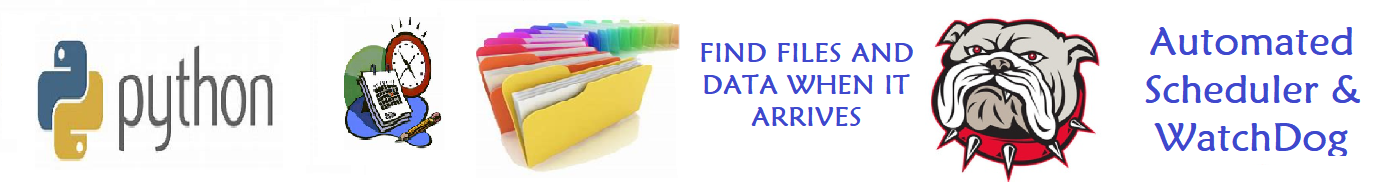

# Unzip Automation
#### by Joe Eberle started on 05-23-2023

# https://github.com/JoeEberle/
# josepheberle@outlook.com

In [1]:
first_install = False 
if first_install:
    ! pip install schedule

In [2]:
import os
import schedule
import time

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'unzip_automation'

## Optional Step 0 - Intitiate Logging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(True)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process unzip_automation Step 0 - Initializing and starting Logging Process.


## Step 1 - create functions to check for data files, directories, or mapped drives

In [5]:
ql.pvlog('info',f'Process {solution_name} - Step 1 - create watch dog functions to check for data files') 

def check_file_existence(directory, filename):
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        print("File exists in the specified directory.")
    else:
        print("File does not exist in the specified directory.")

def check_mapped_drive_existence(drive_letter):
    drive_path = drive_letter + ":\\"
    if os.path.exists(drive_path):
        print("Mapped drive exists.")
    else:
        print("Mapped drive does not exist.")

def check_directory_existence(directory):
    if os.path.exists(directory):
        print("Directory exists.")
    else:
        print("Directory does not exist.")

Process unzip_automation - Step 1 - create watch dog functions to check for data files


## Step 2 - Test for file existence.

In [6]:
testing_and_developing = False

if testing_and_developing: 
    ql.pvlog('info',f'{solution_name} - Step 2 - Test an example file. Watch for existence') 
    # Check for mapped drive existence
    directory = "/path/to/directory"
    filename = "example.txt"
    check_file_existence(directory, filename)    

    # Check for mapped drive existence
    drive_letter = "Z"
    check_mapped_drive_existence(drive_letter)

    # Check for directory existence
    specific_directory = "/path/to/specific/directory"
    check_directory_existence(specific_directory)

In [7]:
def check_file_scheduler(directory, filename, interval_minutes=None, specific_time=None):
    if interval_minutes:
        schedule.every(interval_minutes).minutes.do(check_file_existence, directory=directory, filename=filename)
    elif specific_time:
        schedule.every().day.at(specific_time).do(check_file_existence, directory=directory, filename=filename)
    else:
        print("Invalid scheduler configuration.")

    while True:
        schedule.run_pending()
        time.sleep(1)


## Optional Step 3 - Establish Schedule to file existence

In [8]:
testing_and_developing = False

if testing_and_developing: 
    ql.pvlog('info',f'{solution_name} - Step 3 - Establish Schedule to Test watchdog for file existence') 
    directory = "/path/to/directory"
    filename = "example.txt"
    
    # Check every 15 minutes
#     check_file_scheduler(directory, filename, interval_minutes=15)
    # Check every 1 minutes
    check_file_scheduler(directory, filename, interval_minutes=1)    

    # Check at a specific time of day (e.g., 9:30 AM)
#     check_file_scheduler(directory, filename, specific_time="09:30")

## Step 0 - Process End - display log

In [9]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-02-23 14:48:42,071 - INFO - START unzip_automation =============================================
2024-02-23 14:48:42,071 - INFO - START unzip_automation Start Time = 2024-02-23 14:48:42
2024-02-23 14:48:42,071 - INFO - unzip_automation Step 0 - Initialize the configuration file parser
2024-02-23 14:48:42,220 - INFO - Imported existing <module 'comtypes.gen' from 'C:\\Users\\josep\\anaconda3\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
2024-02-23 14:48:42,220 - INFO - Using writeable comtypes cache directory: 'C:\Users\josep\anaconda3\lib\site-packages\comtypes\gen'
2024-02-23 14:48:48,282 - INFO - Process unzip_automation Step 0 - Initializing and starting Logging Process.
2024-02-23 14:48:54,464 - INFO - Process unzip_automation - Step 1 - create watch dog functions to check for data files
2024-02-23 14:48:54,526 - INFO - PERFORMANCE unzip_automation The total process duration was:12.45
2024-02-23 14:48:54,526 - INFO - PERFORMANCE unzip_automation Stop Time = 2024-02-23 14:4

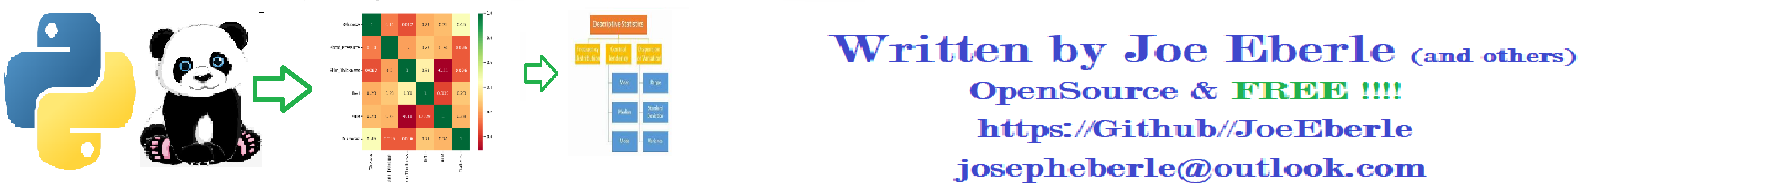

# https://github.com/JoeEberle/
# josepheberle@outlook.com